In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
matplotlib.rc('font',family='NanumGothic')
plt.rc('font',family='NanumGothic')

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df_raw = pd.read_csv('sales_member_join_processed.csv',encoding='utf-8')
df_raw.head()

,customer_id,purchase_id,store_id,purchase_yearmonth,purchase_weekday,purchase_hour,purchase_date,purchase_time,supply_date,item_id,item_g_l,item_g_m,item_g_s,item_name,purchase_cnt,unit_cost,purchase_amt,birth_date,gender,age,agegroup,customer_type,customer_grade,gaip_date,taltoi_date,member_month,gaip_path,flag_member,flag_rcv_sms,flag_rcv_email,flag_rcv_post,zipcode,sigun,dong,ri,address
0,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,:0:14:47:04,2018-01-10,P08010117,간식,과자,스낵,꼬마찹쌀모나카(112g/8개),1,3000,3000,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
1,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,:0:14:47:04,2018-01-10,P09040101,양념/가루,장,간장,제주전통어간장(500ml),1,7900,7900,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
2,C118113,C118113_20180110_87,제주매장,2018M01,수요일,14,2018-01-10,:0:14:47:04,2018-01-10,P09040100,양념/가루,장,간장,맛간장(900ml),1,13600,13600,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
3,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,:0:11:59:24,2018-10-08,P09010305,양념/가루,가루,곡식가루,엿기름가루(무/500g),2,3200,6400,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동
4,C118113,C118113_20181008_22,제주매장,2018M10,월요일,11,2018-10-08,:0:11:59:24,2018-10-08,P09010301,양념/가루,가루,곡식가루,메주가루(500g),2,11000,22000,1975-08-18,여,45,40대,일반,3Gold,2011-12-06,NaN,97,기타,Y,Y,Y,Y,690-122,제주시,아라2동,NaN,제주 제주시 아라2동


### 카테고리별 판매건수, 판매금액, hist -> 파악

판매 금액 : purchase_amt
판매 건수 : purchase_cnt
카테고리 : 제품 대분류 (item_g_l) 제품 중분류 (item_g_m) 제품 소분류 (item_g_s)

In [ ]:
df_raw[['purchase_amt','purchase_cnt']].describe().round(3)
# 27만개 중 21만개가 1개 팔린거
# purchase_amt 가 0인건 증정품 뜻함

,purchase_amt,purchase_cnt
count,273295.000,273295.000
mean,5642.950,1.348
std,10258.024,1.889
min,0.000,1.000
25%,2200.000,1.000
50%,3700.000,1.000
75%,6400.000,1.000
max,2096100.000,150.000


# 제품 대분류

### 총 가격 합

<AxesSubplot:xlabel='item_g_l', ylabel='purchase_amt'>

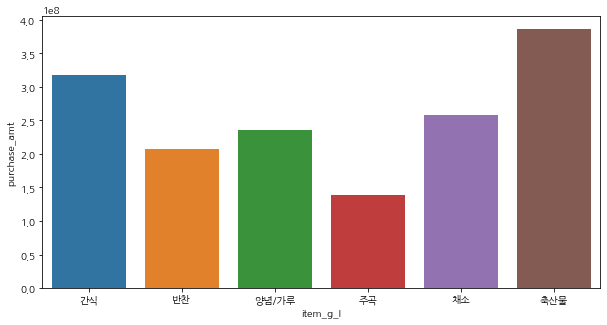

In [ ]:
df_grp_amt1 = df_raw['purchase_amt'].groupby(df_raw['item_g_l']).sum()
df_grp_amt1.sort_values(axis=0,ascending=False)

df_grp_amt1 = pd.DataFrame(df_grp_amt1)
df_grp_amt1['item_g_l'] = df_grp_amt1.index
plt.rcParams['figure.figsize'] = [10, 5] # [width, height] (inches)
sns.barplot(x = df_grp_amt1["item_g_l"],y=df_grp_amt1["purchase_amt"])

### 판매 건수 합

<AxesSubplot:xlabel='item_g_l', ylabel='purchase_cnt'>

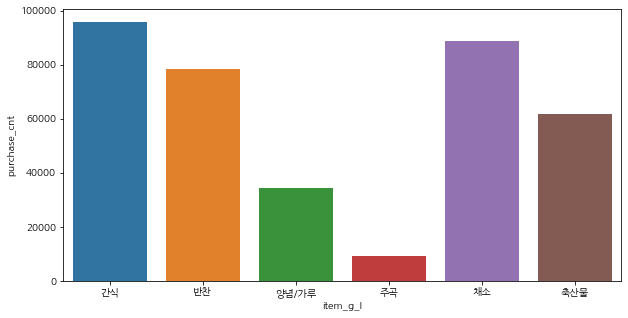

In [ ]:
df_grp_cnt1 = df_raw['purchase_cnt'].groupby(df_raw['item_g_l']).sum()
df_grp_cnt1.sort_values(axis=0,ascending=False)

df_grp_cnt1 = pd.DataFrame(df_grp_cnt1)
df_grp_cnt1['item_g_l'] = df_grp_cnt1.index
plt.rcParams['figure.figsize'] = [5, 5] # [width, height] (inches)
sns.barplot(x = df_grp_cnt1['item_g_l'],y=df_grp_cnt1['purchase_cnt'])
# 총 팔린 제품 갯수 368476

간식 - 과자 떡 밀가공 빵 식사대용 잼/병조림/기타
반찬 - 김치 두부/유부 밑반찬 어묵/묵 절임/장아찌 즉석조리
양념/가루 - 가루 기름/식초 소금 소스/기타양념 장
주곡 - 멥쌀 찹쌀
채소 - 과일채소 김장채소 말린나물/건재 버섯 뿌리채소 쌈채소류 양념채소 열매채소 잎/줄기채소 잎채소 특용작물
축산물 - 꿀 닭 돼지 오리 유정란 유제품 육가공 한우

# 제품 중분류 

### 총 가격 합 - 전체

In [ ]:
df_grp_amt2 = df_raw['purchase_amt'].groupby(df_raw['item_g_m']).sum()
df_grp_amt2 = df_grp_amt2.sort_values(axis=0,ascending=False)
df_grp_amt2 = pd.DataFrame(df_grp_amt2)
df_grp_amt2

,purchase_amt
item_g_m,
멥쌀,119669430
육가공,118148785
밀가공,91971400
두부/유부,86322571
과자,83892182
한우,75930470
가루,69293885
유제품,67222740
유정란,66245810


<AxesSubplot:xlabel='item_g_l', ylabel='purchase_amt'>

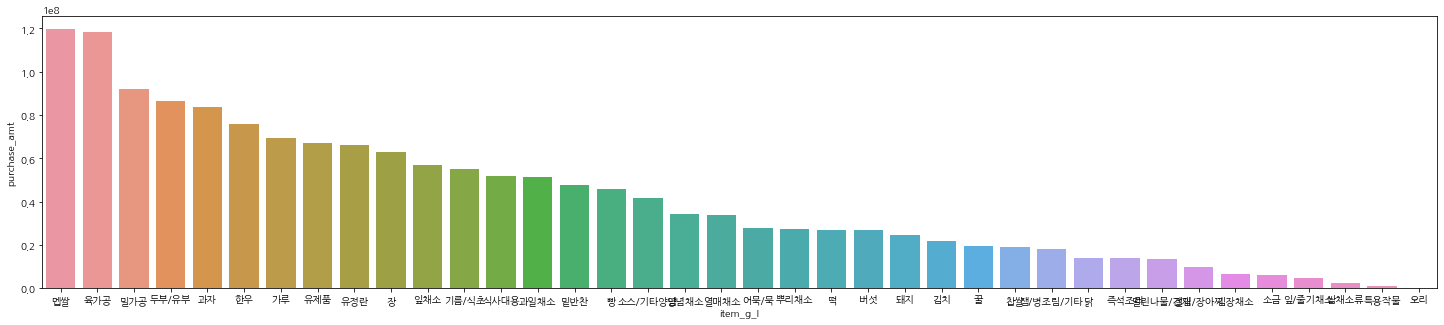

In [ ]:
df_grp_amt2['item_g_l'] = df_grp_amt2.index
plt.rcParams['figure.figsize'] = [25, 5] # [width, height] (inches)
sns.barplot(x = df_grp_amt2['item_g_l'],y=df_grp_amt2['purchase_amt'])

### 판매 건수 합 - 전체

In [ ]:
df_grp_cnt2 = df_raw['purchase_cnt'].groupby(df_raw['item_g_m']).sum()
df_grp_cnt2 = df_grp_cnt2.sort_values(axis=0,ascending=False)
df_grp_cnt2 = pd.DataFrame(df_grp_cnt2)
df_grp_cnt2

,purchase_cnt
item_g_m,
두부/유부,46570
과자,31615
잎채소,28412
밀가공,26526
유제품,23596
밑반찬,16892
빵,15678
육가공,15526
열매채소,14117


<AxesSubplot:xlabel='item_g_l', ylabel='purchase_cnt'>

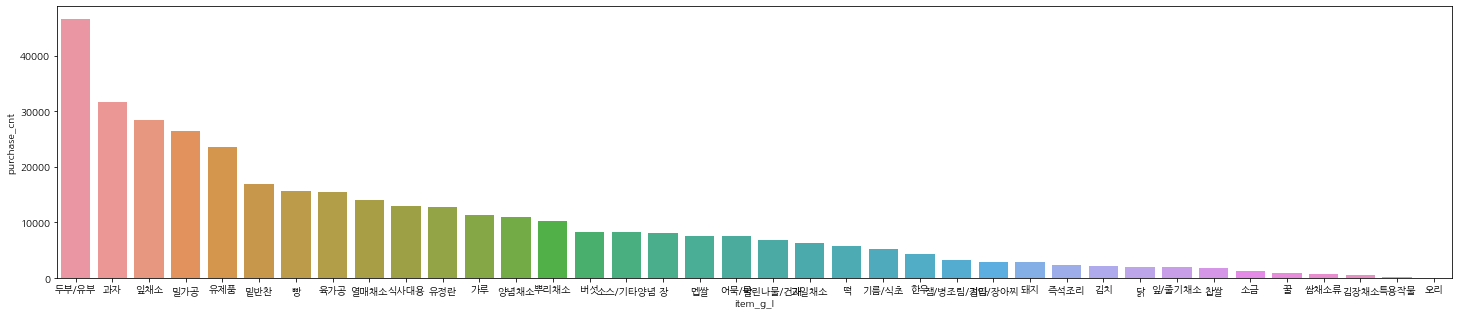

In [ ]:
df_grp_cnt2['item_g_l'] = df_grp_cnt2.index
plt.rcParams['figure.figsize'] = [25, 5] # [width, height] (inches)
sns.barplot(x = df_grp_cnt2['item_g_l'],y=df_grp_cnt2['purchase_cnt'])

간식 - 과자 떡 밀가공 빵 식사대용 잼/병조림/기타
반찬 - 김치 두부/유부 밑반찬 어묵/묵 절임/장아찌 즉석조리
양념/가루 - 가루 기름/식초 소금 소스/기타양념 장
주곡 - 멥쌀 찹쌀
채소 - 과일채소 김장채소 말린나물/건재 버섯 뿌리채소 쌈채소류 양념채소 열매채소 잎/줄기채소 잎채소 특용작물
축산물 - 꿀 닭 돼지 오리 유정란 유제품 육가공 한우

In [ ]:
df_si = df_raw[['item_g_l','item_g_m','purchase_amt','purchase_cnt']]
grouped = df_si.groupby(['item_g_l','item_g_m'])
gdf = grouped.sum()
gdf

purchase_amt  purchase_cnt
item_g_l item_g_m                            
간식       과자            83892182         31615
         떡             26820480          5843
         밀가공           91971400         26526
         빵             45800792         15678
         식사대용          51580480         12877
         잼/병조림/기타      17989705          3183
반찬       김치            21551365          2155
         두부/유부         86322571         46570
         밑반찬           47718545         16892
         어묵/묵          27643265          7490
         절임/장아찌         9673211          2965
         즉석조리          13752385          2320
양념/가루    가루            69293885         11276
         기름/식초         55170030          5279
         소금             5948275          1227
         소스/기타양념       41764100          8328
         장             63056340          8162
주곡       멥쌀           119669430          7643
         찹쌀            18783815          1763
채소       과일채소          51473935          6318
         김장채소           6273420           571
         말린나물/건재       13559855          6789
         버섯            26742258          8354
         뿌리채소          27497330         10346
         쌈채소류           2103440           683
         양념채소          34046244         11020
         열매채소          33561371         14117
         잎/줄기채소         4823280          1945
         잎채소           56739371         28412
         특용작물           1117000           187
축산물      꿀             19548025           844
         닭             13966415          2037
         돼지            24644425          2900
         오리              143650            17
         유정란           66245810         12764
         유제품           67222740         23596
         육가공          118148785         15526
         한우            75930470          4257

In [ ]:
df_si = df_raw[['item_g_l','item_g_m','item_g_s','purchase_amt','purchase_cnt']]
grouped = df_si.groupby(['item_g_l','item_g_m','item_g_s'])
gdf = grouped.sum()
gdf

purchase_amt  purchase_cnt
item_g_l item_g_m item_g_s                             
간식       과자       스낵             58152362         24832
                  엿/양갱/기타         6730865          3732
                  쿠키              3414115           902
                  한과/유과          15594840          2149
         떡        가래떡             1538350           471
...                                   ...           ...
축산물      한우       대용량물품(정육)        313900            12
                  안심대안한우         11690090           736
                  유기한우           14336700           849
                  일반 한우          41980040          2114
                  한우              7609740           546

[329 rows x 2 columns]

# 함수

### 총 가격 합

In [ ]:
def chong(i):
    df_gan = df_raw[df_raw['item_g_l']==i] 
    df_grp_amt2 = df_gan['purchase_amt'].groupby(df_gan['item_g_m']).sum()
    df_grp_amt2 = df_grp_amt2.sort_values(axis=0,ascending=False)
    df_grp_amt2 = pd.DataFrame(df_grp_amt2)
    df_grp_amt2
    df_grp_amt2['item_g_l'] = df_grp_amt2.index
    plt.rcParams['figure.figsize'] = [10, 5] # [width, height] (inches)
    sns.barplot(x = df_grp_amt2['item_g_l'],y=df_grp_amt2['purchase_amt'])

### 판매 건수 합

In [ ]:
def cnt(i):
    df_gan = df_raw[df_raw['item_g_l']==i] 
    df_grp_cnt2 = df_gan['purchase_cnt'].groupby(df_gan['item_g_m']).sum()
    df_grp_cnt2 = df_grp_cnt2.sort_values(axis=0,ascending=False)
    df_grp_cnt2 = pd.DataFrame(df_grp_cnt2)
    df_grp_cnt2
    df_grp_cnt2['item_g_l'] = df_grp_cnt2.index
    plt.rcParams['figure.figsize'] = [10, 5] # [width, height] (inches)
    sns.barplot(x = df_grp_cnt2['item_g_l'],y=df_grp_cnt2['purchase_cnt'])

### 총 가격 합 - 간식

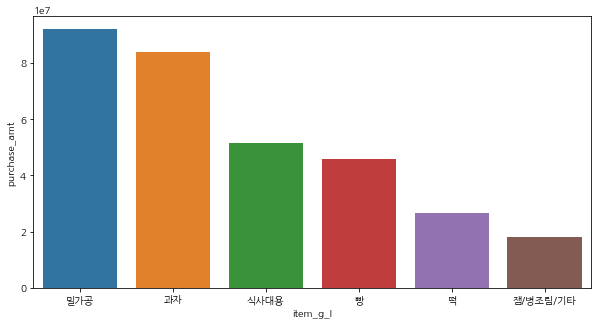

In [ ]:
chong('간식')

### 판매 건수 합 - 간식

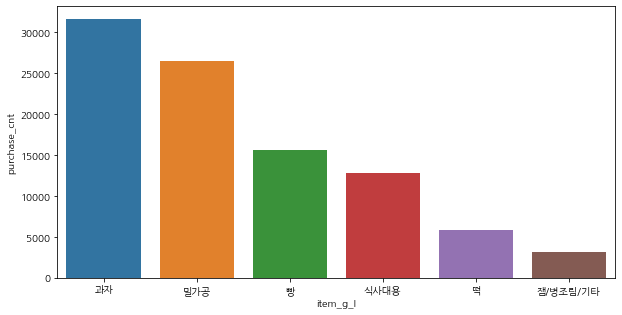

In [ ]:
cnt('간식')

In [ ]:
sns.pairplot(df)

### 총 가격 합 -  반찬

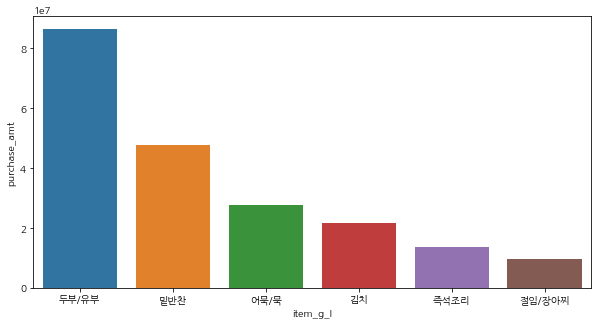

In [ ]:
chong('반찬')

### 판매 건수 합 - 반찬

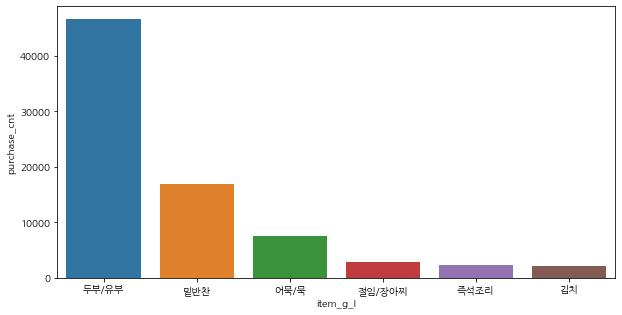

In [ ]:
cnt('반찬')

### 총 가격 합 -  양념/가루

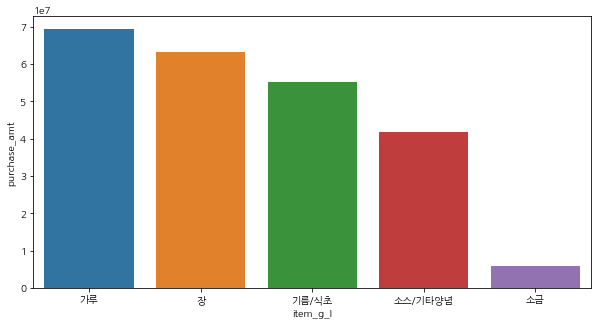

In [ ]:
chong('양념/가루')

### 판매 건수 합 - 양념/가루

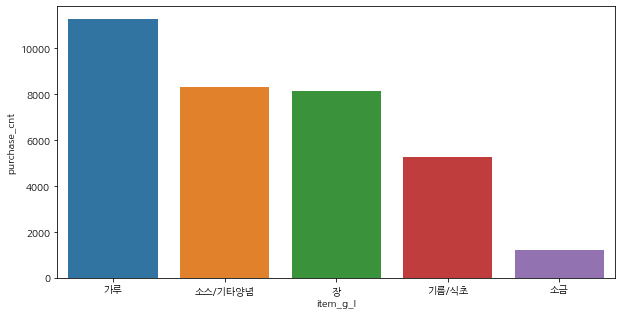

In [ ]:
cnt('양념/가루')

### 총 가격 합 -  주곡

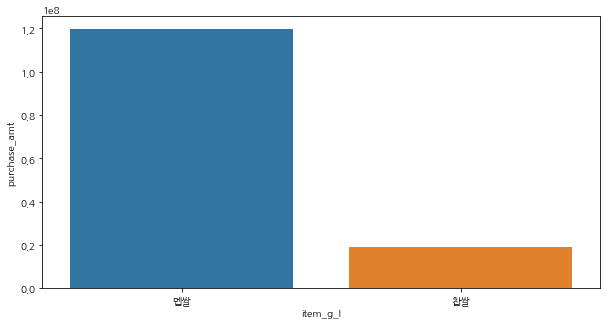

In [ ]:
chong('주곡')

### 판매 건수 합 - 주곡

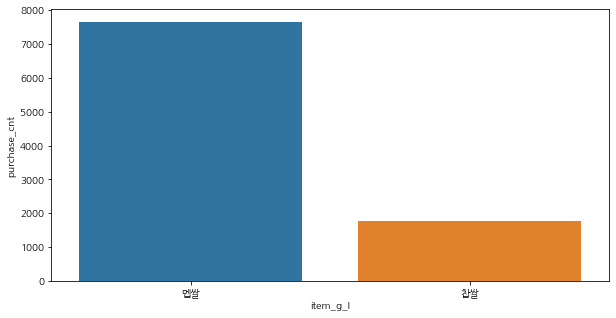

In [ ]:
cnt('주곡')

### 총 가격 합 -  채소

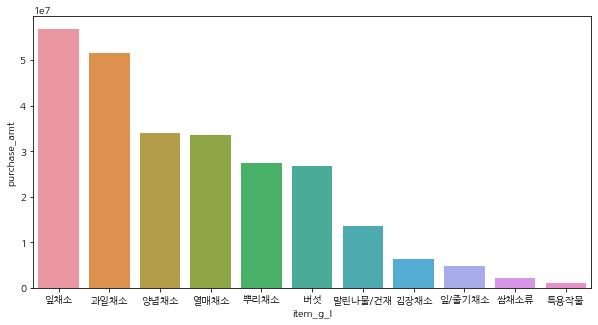

In [ ]:
chong('채소')

### 판매 건수 합 - 채소

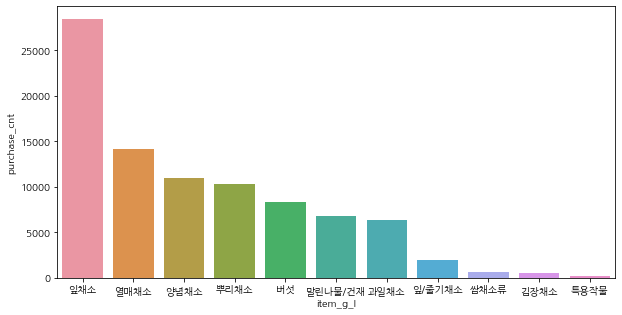

In [ ]:
cnt('채소')

### 총 가격 합 -  축산물

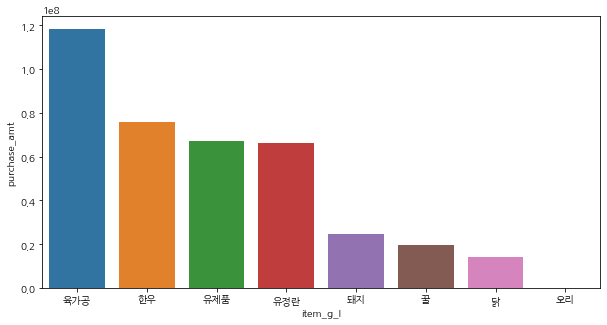

In [ ]:
chong('축산물')

### 판매 건수 합 - 축산물

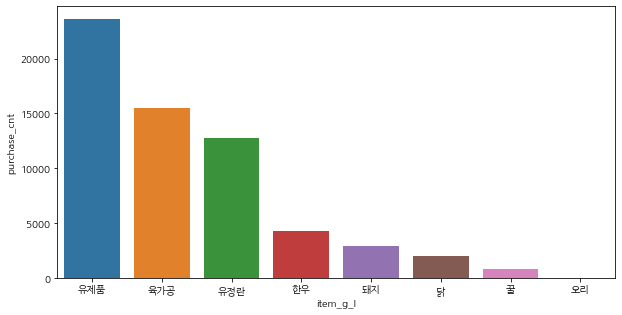

In [ ]:
cnt('축산물')

In [ ]:
중분류 까지 각각의 매출과 판매 건수를 볼 수 있음

In [ ]:
df_sumnew = df_sales['purchase_amt'].groupby(df_sales['purchase_weekday']).sum()
df_sumnew.plot.bar()

NameError: name 'df_sales' is not defined

In [ ]:
sns.countplot(x="purchase_weekday", data=df_sales)
plt.title("abc")
plt.show()

In [ ]:
df_sumnew = df_sales['purchase_amt'].groupby(df_sales['purchase_weekday']).sum()
df_sumnew.plot.pie(y="purchase_amt",autopct="%.1f%%")

In [ ]:
df_zipcode = pd.read_csv('./jeju_zipcode.csv',encoding='cp949')
df_zipcode.head()

In [ ]:
df_dict = pd.read_excel('./유통_Data Dictionary.xlsx',engine='openpyxl',sheet_name='데이터 사전')
df_dict.head()